In [122]:
import scipy as sp
import matplotlib.pyplot as plotter
%matplotlib inline
from scipy import signal

# Prvi zadatak

<Container object of 3 artists>

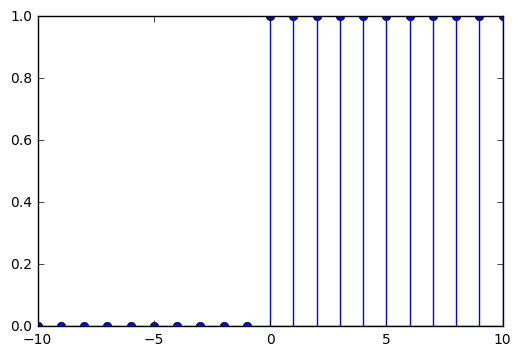

In [104]:
N=sp.arange(-10,11,1)
x=sp.zeros(21)
x=1*(N>=0)
plotter.stem(N,x)

<Container object of 3 artists>

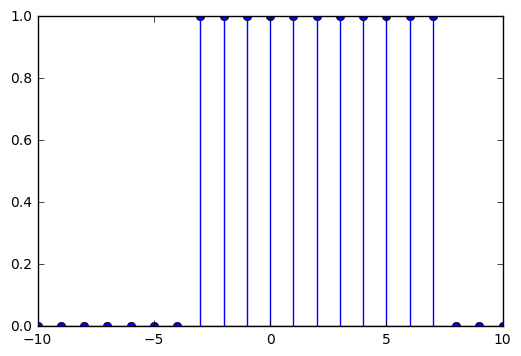

In [105]:
# Zakasnjenje signala
num = -3
x1 = sp.roll(x, num)
x1[num:] = 0
plotter.stem(N,x1)

<Container object of 3 artists>

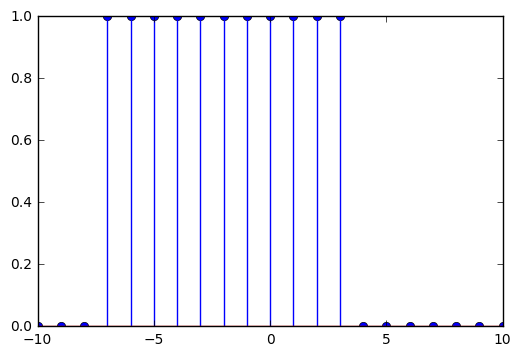

In [106]:
plotter.stem(N[::-1],x1)

# Drugi zadatak

In [107]:
h=sp.random.randint(-5,5,10)
z=signal.convolve(x,h)

<Container object of 3 artists>

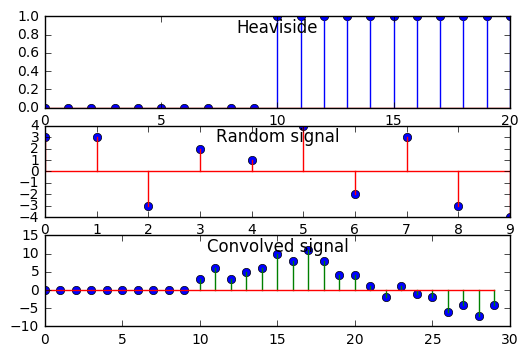

In [108]:
plotter.subplot(311)
plotter.title("Heaviside", y= 0.75)
plotter.stem(x)
plotter.subplot(312)
plotter.title("Random signal", y= 0.75)
plotter.stem(h, 'r')
plotter.subplot(313)
plotter.title("Convolved signal", y= 0.75)
plotter.stem(z, 'g')

# Treci zadatak

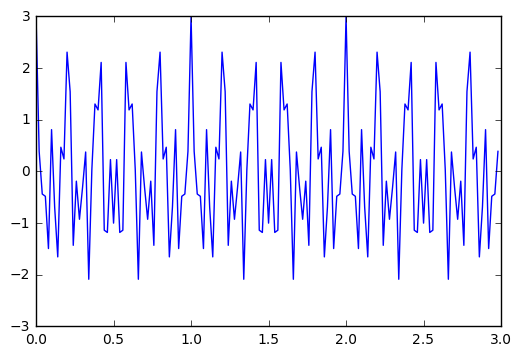

In [109]:
Fs = 50 
#max frekvencija signala je 2x manja od min frekvencije odabiranja, a to je 38 
# (uzimamo 50 da bi nam bilo lakse kasnije pri kreiranju filtera)
t=sp.arange(0,3,1/Fs)
f = sp.cos(2*sp.pi*5*t) + sp.cos(2*sp.pi*10*t) + sp.cos(2*sp.pi*19*t)
plotter.plot(t,f)

<Container object of 3 artists>

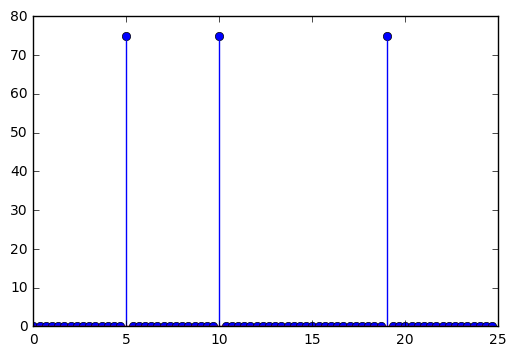

In [110]:
# U sprektralnom domenu imamo sledeci grafik pri kom se jasno vide 3 frekvencije na kojima se ovaj signal nalazi
X = sp.fft(f)
F = sp.linspace(0,Fs,len(f)+1)
F = F[:-1]
N = len(X)
plotter.stem(F[0:int(N/2)], sp.absolute(X[0:int(N/2)]), 'b')

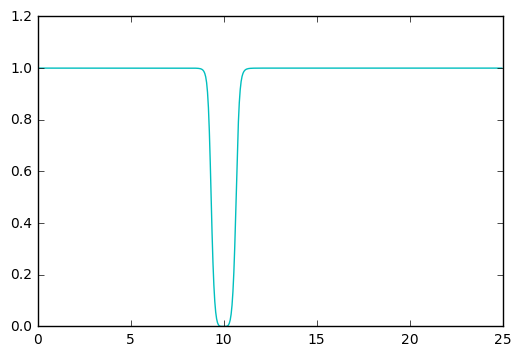

In [111]:
#1.2 Ostaviti frekvencije 5 i 19 Hz - bandstop filterom mozemo ukloniti signal na 10Hz
b,a = signal.butter(5,[0.37, 0.43], btype = 'bandstop')
w,h = signal.freqz(b,a)
fNorm = w / sp.pi
fNew = fNorm * (Fs/2)
plotter.plot(fNew, sp.absolute(h), 'c')
#izgled filtra mozemo vidjeti na sledecem grafiku

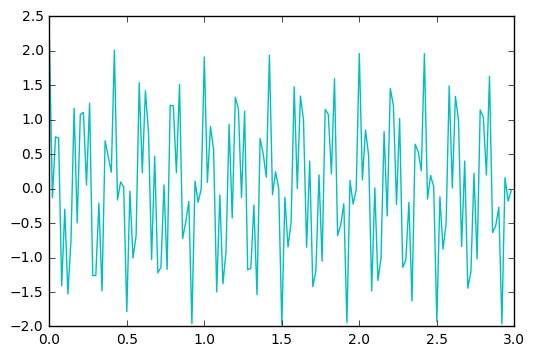

In [112]:
# Filtrirani signal bi trebao da izgleda kao na sledecem grafiku
y3 = signal.lfilter(b,a,f)
plotter.plot(t,y3, 'c')

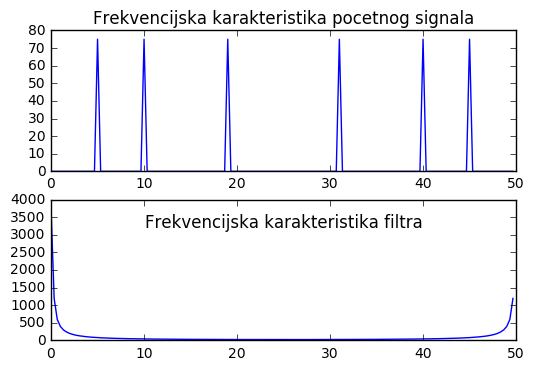

In [113]:
#2 frekvencijska karakteristika
X=sp.fft(f)

Ft = sp.linspace(0,Fs, len(X)+1)
Ft = Ft[:-1]

Y=sp.fft(F)

Fft = sp.linspace(0,Fs, len(Y)+1)
Fft = Fft[:-1]

plotter.subplot(211)
plotter.title("Frekvencijska karakteristika pocetnog signala")
plotter.plot(Ft, sp.absolute(X))
plotter.subplot(212)
plotter.title("Frekvencijska karakteristika filtra", y = 0.75)
plotter.plot(Fft, sp.absolute(Y))

# Cetvrti zadatak

In [114]:
t=sp.linspace(-1,1,2000)
x=sp.cos(2*sp.pi*50*t)+sp.random.randn(len(t))*0.2

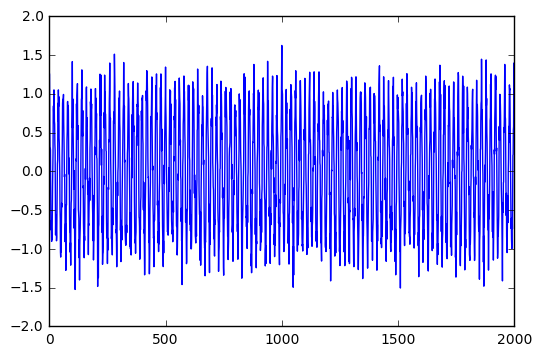

In [115]:
plotter.plot(x)

In [116]:
Fs=100
X=sp.fft(x)

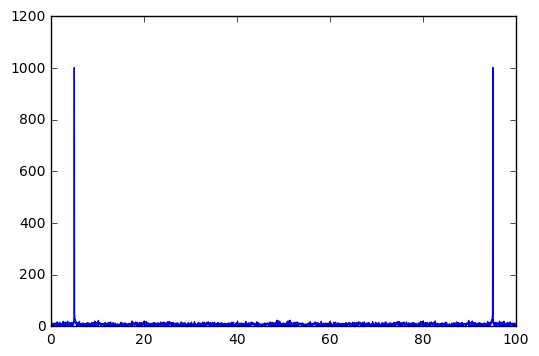

In [117]:
F = sp.linspace(0,Fs, len(X)+1)
F = F[:-1]
plotter.plot(F, sp.absolute(X))

In [120]:
b, a = signal.butter(4, [0.095, 0.105], btype = 'bandstop')
w, k = signal.freqz(b, a)
F = signal.lfilter(b, a, x)

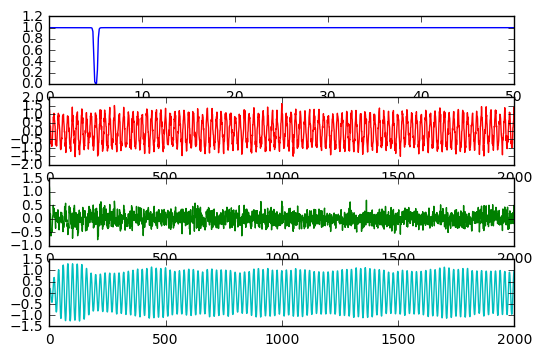

In [121]:
plotter.subplot(411) # bandstop filter
plotter.plot(w * (Fs/2) / sp.pi, sp.absolute(k))
plotter.subplot(412) # pocetni signal
plotter.plot(x, 'r')
plotter.subplot(413) #isfiltrirani signal (samo sum)
plotter.plot(F, 'g') 
plotter.subplot(414) # finalni signal (kada od pocetnog signala oduzmemo sum dobijemo cist kosinusni signal)
plotter.plot(x-F, 'c')
#provjerom x-F signala uvdjamo da je signal ociscen od suma, tj da sadrzi samo dvije komponente koje poticu od 
#kosinusnog signala